In [1]:
%matplotlib inline

import nengo
from nengo import spa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nengo_ocl

# Read Vision Output Data

In [2]:
list_length = 10
vision_inputs_file = 'vision_output_list_length_{}.csv'.format(list_length)
vision_inputs_image = 'vision_output_list_length_{}.png'.format(list_length)

vision_output = pd.read_csv(vision_inputs_file)
original_numbers = vision_output['true'].tolist()
numbers = vision_output['pred'].tolist()
numbers

[0, 1, 2, 3, 4, 6, 6, 7, 8, 9]

# Serial Recall Memory System

In [3]:
def num_input_1(t):
    if t < time_step:
        return mappings[numbers[0]]
    else:
        return '0'


def num_input_2(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    else:
        return '0'


def num_input_3(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    else:
        return '0'


def num_input_4(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    else:
        return '0'


def num_input_5(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    elif time_step * 4 < t < time_step * 5:
        return mappings[numbers[4]]
    else:
        return '0'


def num_input_6(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    elif time_step * 4 < t < time_step * 5:
        return mappings[numbers[4]]
    elif time_step * 5 < t < time_step * 6:
        return mappings[numbers[5]]
    else:
        return '0'


def num_input_7(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    elif time_step * 4 < t < time_step * 5:
        return mappings[numbers[4]]
    elif time_step * 5 < t < time_step * 6:
        return mappings[numbers[5]]
    elif time_step * 6 < t < time_step * 7:
        return mappings[numbers[6]]
    else:
        return '0'


def num_input_8(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    elif time_step * 4 < t < time_step * 5:
        return mappings[numbers[4]]
    elif time_step * 5 < t < time_step * 6:
        return mappings[numbers[5]]
    elif time_step * 6 < t < time_step * 7:
        return mappings[numbers[6]]
    elif time_step * 7 < t < time_step * 8:
        return mappings[numbers[7]]
    else:
        return '0'


def num_input_9(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    elif time_step * 4 < t < time_step * 5:
        return mappings[numbers[4]]
    elif time_step * 5 < t < time_step * 6:
        return mappings[numbers[5]]
    elif time_step * 6 < t < time_step * 7:
        return mappings[numbers[6]]
    elif time_step * 7 < t < time_step * 8:
        return mappings[numbers[7]]
    elif time_step * 8 < t < time_step * 9:
        return mappings[numbers[8]]
    else:
        return '0'


def num_input_10(t):
    if t < time_step:
        return mappings[numbers[0]]
    elif time_step < t < time_step * 2:
        return mappings[numbers[1]]
    elif time_step * 2 < t < time_step * 3:
        return mappings[numbers[2]]
    elif time_step * 3 < t < time_step * 4:
        return mappings[numbers[3]]
    elif time_step * 4 < t < time_step * 5:
        return mappings[numbers[4]]
    elif time_step * 5 < t < time_step * 6:
        return mappings[numbers[5]]
    elif time_step * 6 < t < time_step * 7:
        return mappings[numbers[6]]
    elif time_step * 7 < t < time_step * 8:
        return mappings[numbers[7]]
    elif time_step * 8 < t < time_step * 9:
        return mappings[numbers[8]]
    elif time_step * 9 < t < time_step * 10:
        return mappings[numbers[8]]
    else:
        return '0'

In [4]:
def position_input_1(t):
    if t < time_step:
        return 'POS1'
    else:
        return '0'

def position_input_2(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    else:
        return '0'

def position_input_3(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    else:
        return '0'

def position_input_4(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    else:
        return '0'
    
def position_input_5(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    elif time_step * 4 < t < time_step * 5:
        return 'POS5'
    else:
        return '0'
    
def position_input_6(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    elif time_step * 4 < t < time_step * 5:
        return 'POS5'
    elif time_step * 5 < t < time_step * 6:
        return 'POS6'
    else:
        return '0'
    
def position_input_7(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    elif time_step * 4 < t < time_step * 5:
        return 'POS5'
    elif time_step * 5 < t < time_step * 6:
        return 'POS6'
    elif time_step * 6 < t < time_step * 7:
        return 'POS7'
    else:
        return '0'
    
def position_input_8(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    elif time_step * 4 < t < time_step * 5:
        return 'POS5'
    elif time_step * 5 < t < time_step * 6:
        return 'POS6'
    elif time_step * 6 < t < time_step * 7:
        return 'POS7'
    elif time_step * 7 < t < time_step * 8:
        return 'POS8'
    else:
        return '0'
    
def position_input_9(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    elif time_step * 4 < t < time_step * 5:
        return 'POS5'
    elif time_step * 5 < t < time_step * 6:
        return 'POS6'
    elif time_step * 6 < t < time_step * 7:
        return 'POS7'
    elif time_step * 7 < t < time_step * 8:
        return 'POS8'
    elif time_step * 8 < t < time_step * 9:
        return 'POS9'
    else:
        return '0'
    
def position_input_10(t):
    if t < time_step:
        return 'POS1'
    elif time_step < t < time_step * 2:
        return 'POS2'
    elif time_step * 2 < t < time_step * 3:
        return 'POS3'
    elif time_step * 3 < t < time_step * 4:
        return 'POS4'
    elif time_step * 4 < t < time_step * 5:
        return 'POS5'
    elif time_step * 5 < t < time_step * 6:
        return 'POS6'
    elif time_step * 6 < t < time_step * 7:
        return 'POS7'
    elif time_step * 7 < t < time_step * 8:
        return 'POS8'
    elif time_step * 8 < t < time_step * 9:
        return 'POS9'
    elif time_step * 9 < t < time_step * 10:
        return 'POS10'
    else:
        return '0'

In [5]:
drug_type = 'PHE'
# drug_effect = {'control':1.0,'PHE':0.985,'GFC':1.03} # duggins paper value
drug_effect = {'control':0.9,'PHE':0.85,'GFC':0.95}

In [6]:
time_step = 0.25
feedback = drug_effect[drug_type]
print(feedback)
# numbers = list(range(3))
# numbers = [3, 5, 1, 9]
count_numbers = len(numbers)
# sim_time = (time_step * count_numbers) + 1.2
sim_time = 10.2
seed = 42
dt = 0.001

mappings = {0: 'ZER0', 1: 'ONE', 2: 'TWO', 3: 'THREE', 4: 'FOUR', 
            5: 'FIVE', 6: 'SIX', 7: 'SEVEN', 8: 'EIGHT', 9: 'NINE'}

num_input_method = eval('num_input_' + str(count_numbers))
pos_input_method = eval('position_input_' + str(count_numbers))
print(num_input_method, pos_input_method)
sqnce = []
for i in range(len(numbers)):
#     sqnce.append('0')
    sqnce.append('POS'+str(i+1))
#     sqnce.append(mappings[numbers[i]])
#     sqnce.append('0')
print(sqnce)

0.85
<function num_input_10 at 0x130881dc0> <function position_input_10 at 0x1308c3430>
['POS1', 'POS2', 'POS3', 'POS4', 'POS5', 'POS6', 'POS7', 'POS8', 'POS9', 'POS10']


In [8]:
def cue_input(t):
    if t < time_step * count_numbers:
        return '0'
    if t > (time_step * count_numbers) and t < (time_step * count_numbers) + 1:
        sequence = sqnce
        idx = int(((t - (time_step*count_numbers)) // (1. / len(sequence))) % len(sequence))
        return sequence[idx]
    if t > (time_step * count_numbers) + 5 and t < (time_step * count_numbers) + 6:
        sequence = sqnce
        idx = int(((t - (time_step*count_numbers)) // (1. / len(sequence))) % len(sequence))
        return sequence[idx]
    else:
        return '0'

model = spa.SPA(label="Serial Recall Working Memory", seed=seed)

dimensions = 512
neurons_per_dimension = 50
vocab = model.get_default_vocab(dimensions)
vocab_data_1 = '+'.join(['POS{}'.format(i) for i in range(1, count_numbers+1)])
vocab_data_2 = '+'.join(['{}'.format(mappings[numbers[i]]) for i in range(count_numbers)])
vocab_data = vocab_data_1 + '+' + vocab_data_2
# print(vocab_data)
vocab.parse(vocab_data)

with model:    
    model.position_in = spa.State(dimensions=dimensions,
                                 neurons_per_dimension=neurons_per_dimension)
    model.number_in = spa.State(dimensions=dimensions,
                               neurons_per_dimension=neurons_per_dimension)
    model.conv = spa.State(dimensions=dimensions, 
                           neurons_per_dimension=neurons_per_dimension,
                           feedback=feedback,
                           feedback_synapse=0.4)
    model.cue = spa.State(dimensions=dimensions,
                         neurons_per_dimension=neurons_per_dimension)
    model.out = spa.State(dimensions=dimensions,
                         neurons_per_dimension=neurons_per_dimension)
    model.am = spa.AssociativeMemory(vocab, threshold=0.1)

    model.inp = spa.Input(position_in=pos_input_method, 
                          number_in=num_input_method, cue=cue_input)
    
    # Connect the buffers
    cortical_actions = spa.Actions(
        'conv = position_in * number_in',
        'out = conv * ~cue',
        'am = out'
    )
    model.cortical = spa.Cortical(cortical_actions,
                                 neurons_cconv=neurons_per_dimension*4)  
    
    model.config[nengo.Probe].synapse = nengo.Lowpass(0.03)
    position_in = nengo.Probe(model.position_in.output, sample_every=dt)
    number_in = nengo.Probe(model.number_in.output, sample_every=dt)
    cue = nengo.Probe(model.cue.output, sample_every=dt)
    conv = nengo.Probe(model.conv.output, sample_every=dt)
    out = nengo.Probe(model.out.output, sample_every=dt)
    clean = nengo.Probe(model.am.output, sample_every=dt)

In [9]:
print(model.n_neurons)

540150


In [10]:
import pyopencl as cl
pltf = cl.get_platforms()[0]
ctx = cl.Context([pltf.get_devices()[0]])

sim = nengo_ocl.Simulator(model, dt=dt, context=ctx)
sim.run(sim_time)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

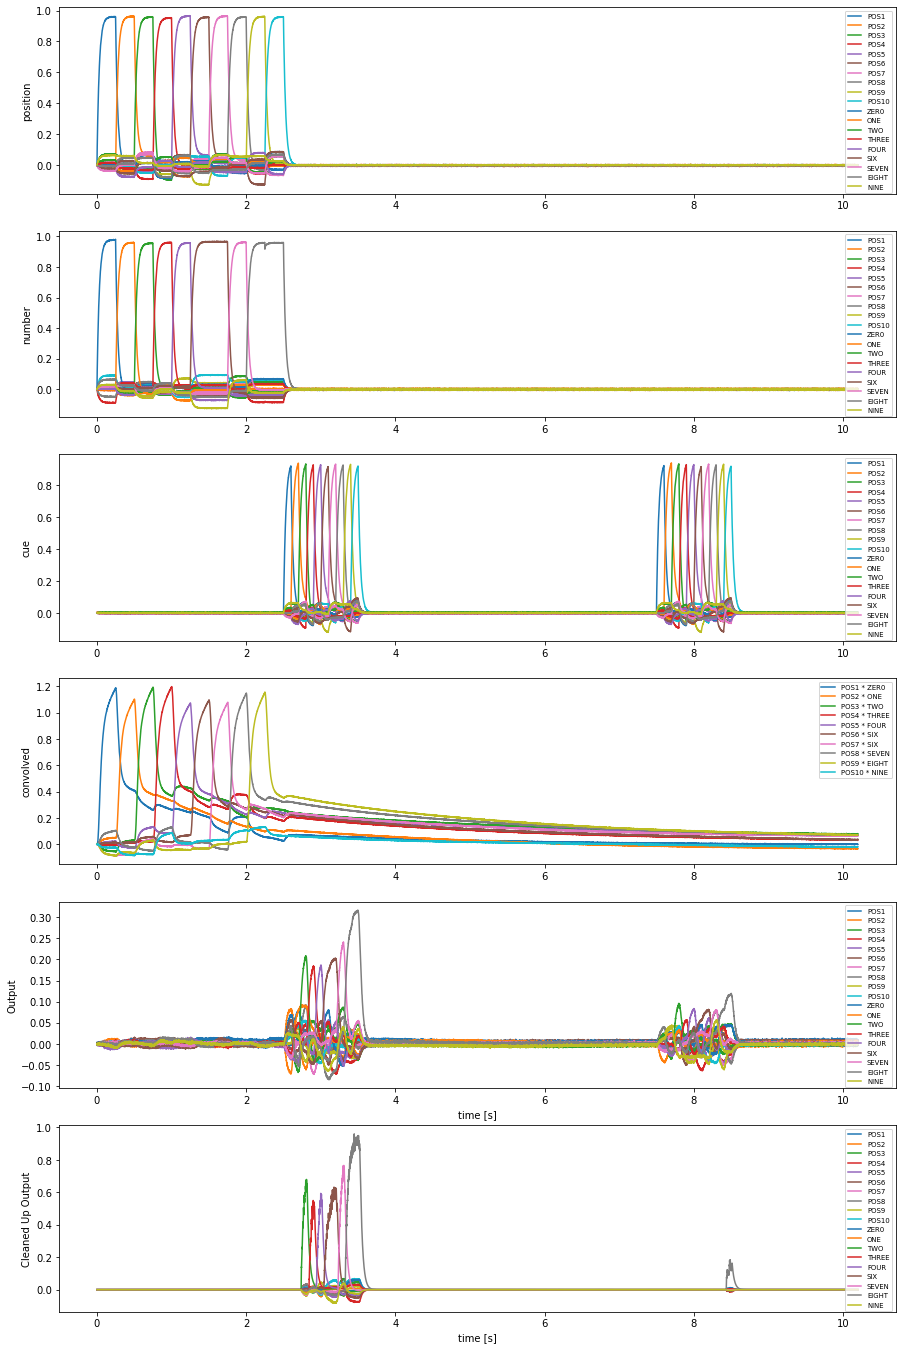

In [11]:
mem_output_image = 'mem_output_list_length_{}_{}.png'.format(drug_type, 
                                              list_length)

fig = plt.figure(figsize=(15, 24))

plt.subplot(6, 1, 1)
plt.plot(sim.trange(), model.similarity(sim.data, position_in))
plt.legend(model.get_output_vocab('position_in').keys, 
           fontsize='x-small')
plt.ylabel("position")

plt.subplot(6, 1, 2)
plt.plot(sim.trange(), model.similarity(sim.data, number_in))
plt.legend(model.get_output_vocab('number_in').keys, fontsize='x-small')
plt.ylabel("number")

plt.subplot(6, 1, 3)
plt.plot(sim.trange(), model.similarity(sim.data, cue))
plt.legend(model.get_output_vocab('cue').keys, fontsize='x-small')
plt.ylabel("cue")

ptrs = ['POS{} * {}'.format(i, mappings[numbers[i-1]]) for i in range(1, count_numbers+1)]

plt.subplot(6, 1, 4)
for pointer in ptrs:
    plt.plot(sim.trange(), vocab.parse(pointer).dot(sim.data[conv].T),
             label=pointer)
plt.legend(fontsize='x-small')
plt.ylabel("convolved")

plt.subplot(6, 1, 5)
plt.plot(sim.trange(), spa.similarity(sim.data[out], vocab))
plt.legend(model.get_output_vocab('out').keys, fontsize='x-small')
plt.ylabel("Output")
plt.xlabel("time [s]");

plt.subplot(6, 1, 6)
plt.plot(sim.trange(), spa.similarity(sim.data[clean], vocab))
plt.legend(model.get_output_vocab('am').keys, fontsize='x-small')
plt.ylabel("Cleaned Up Output")
plt.xlabel("time [s]");

fig.savefig(mem_output_image)